In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from random import Random

In [279]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [251]:
data_shuffled = data.sample(frac = 1)
print(data_shuffled.shape)
data_shuffled.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
226,88147101,B,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.012160,...,11.52,19.80,73.47,395.4,0.1341,0.11530,0.026390,0.044640,0.2615,0.08269
20,8510653,B,13.08,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,...,14.50,20.49,96.09,630.5,0.1312,0.27760,0.189000,0.072830,0.3184,0.08183
280,8912049,M,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.192100,0.096640,...,23.72,35.90,159.80,1724.0,0.1782,0.38410,0.575400,0.187200,0.3258,0.09720
285,8912521,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.001860,0.002924,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
229,881861,M,12.83,22.33,85.26,503.2,0.10880,0.17990,0.169500,0.068610,...,15.20,30.15,105.30,706.0,0.1777,0.53430,0.628200,0.197700,0.3407,0.12430


In [259]:
X = data.drop(['diagnosis', 'id'], axis=1)
X_shuffled = data_shuffled.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']
y_shuffled = data_shuffled['diagnosis']
y.replace({'M' : 1, 'B' : -1}, inplace=True)
y_shuffled.replace({'M' : 1, 'B' : -1}, inplace=True)
print(f'X shape: {X.shape}')
print(f'X shuffled shape: {X_shuffled.shape}')
print(f'y shape: {y.shape}')
print(f'y shuffled shape: {y_shuffled.shape}')
print(y.unique())

X shape: (569, 30)
X shuffled shape: (569, 30)
y shape: (569,)
y shuffled shape: (569,)
[ 1 -1]


PART A

In [260]:
# filling null values with mean
def featureEngineering1(X):
    for i in range(X.shape[1]):
        X.iloc[:,i] = X.iloc[:,i].fillna(X.iloc[:,i].mean())
    return X


In [261]:
# function to normalize data
def featureEngineering2(X):
    for i in range(X.shape[1]):
        X.iloc[:,i] = (X.iloc[:,i] - X.iloc[:,i].mean()) / X.iloc[:,i].std()    
    return X

In [262]:
def perceptron(X, y):
    features = X.shape[1]
    # print(features)
    weights = np.zeros(features)
    accuracy = [0]
    iter = [0]
    # print(weights)
    for j in range(10000):
        flag = True
        for index, row in X.iterrows():
            if(y[index] * (np.dot(weights.T, row)) <= 0):
                # print("Index: ", index)
                flag = False
                weights = weights + y[index] * row
                break
        predictions = y * np.dot(X, weights)
        predictions = predictions > 0
        # print(weights)
        if j%100 == 0:
            if j%1000 == 0:
                print(f'Accuracy at iteration {j} : {100 * (predictions.sum()/X.shape[0])}')
            accuracy.append(100 * (predictions.sum()/X.shape[0]))
            iter.append(j)
        if flag:
            break    
    return weights, accuracy, iter

In [263]:
def predict(X, y, weights):
    predictions = y * np.dot(X, weights)
    predictions = predictions > 0
    return predictions.sum()/X.shape[0]

In [264]:
def train_test_split(X, y, test_size):
    X_train = X.iloc[:int(X.shape[0] * (1-test_size)),:]
    X_test = X.iloc[int(X.shape[0] * (1-test_size)):,:]
    y_train = y.iloc[:int(y.shape[0] * (1-test_size))]
    y_test = y.iloc[int(y.shape[0] * (1-test_size)):]
    return X_train, X_test, y_train, y_test

PM1

PM1: Train X - (381, 30), Test X - (188, 30), Train Y - (381,), Test Y - (188,)

Accuracy at iteration 0 : 44.35695538057743
Accuracy at iteration 1000 : 82.93963254593176
Accuracy at iteration 2000 : 72.17847769028872
Accuracy at iteration 3000 : 73.49081364829397
Accuracy at iteration 4000 : 44.35695538057743
Accuracy at iteration 5000 : 72.44094488188976
Accuracy at iteration 6000 : 74.2782152230971
Accuracy at iteration 7000 : 75.8530183727034
Accuracy at iteration 8000 : 45.14435695538058
Accuracy at iteration 9000 : 45.14435695538058

Accuracy of PM1 on test data: 43.08510638297872


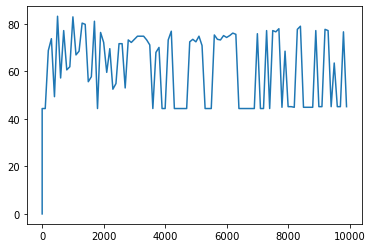

In [265]:
X_PM1 = featureEngineering1(X)
X_train, X_test, y_train, y_test = train_test_split(X_PM1, y, 0.33)
print(f'PM1: Train X - {X_train.shape}, Test X - {X_test.shape}, Train Y - {y_train.shape}, Test Y - {y_test.shape}\n')
weights, acc, iter = perceptron(X_train, y_train)
print(f'\nAccuracy of PM1 on test data: {100 * predict(X_test, y_test, weights)}')
plt.plot(iter, acc)
plt.show()

PM2

PM2: Train X - (381, 30), Test X - (188, 30), Train Y - (381,), Test Y - (188,)

Accuracy at iteration 0 : 63.25459317585301
Accuracy at iteration 1000 : 60.367454068241464
Accuracy at iteration 2000 : 72.70341207349081
Accuracy at iteration 3000 : 59.84251968503938
Accuracy at iteration 4000 : 82.93963254593176
Accuracy at iteration 5000 : 67.45406824146981
Accuracy at iteration 6000 : 85.56430446194226
Accuracy at iteration 7000 : 70.86614173228347
Accuracy at iteration 8000 : 83.2020997375328
Accuracy at iteration 9000 : 75.06561679790026

Accuracy of PM2 on test data: 73.40425531914893


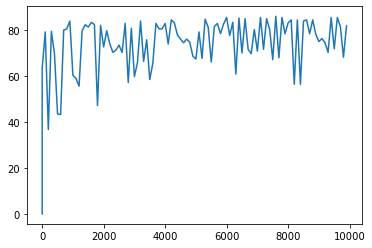

In [249]:
X_PM2 = featureEngineering1(X_shuffled)
X_train, X_test, y_train, y_test = train_test_split(X_PM2, y_shuffled, 0.33)
print(f'PM2: Train X - {X_train.shape}, Test X - {X_test.shape}, Train Y - {y_train.shape}, Test Y - {y_test.shape}\n')
weights, acc, iter = perceptron(X_train, y_train)
print(f'\nAccuracy of PM2 on test data: {100 * predict(X_test, y_test, weights)}')
plt.plot(iter, acc)
plt.show()

PM3

PM3: Train X - (381, 30), Test X - (188, 30), Train Y - (381,), Test Y - (188,)

Accuracy at iteration 0 : 87.4015748031496
Accuracy at iteration 1000 : 98.4251968503937
Accuracy at iteration 2000 : 97.63779527559055
Accuracy at iteration 3000 : 98.16272965879264
Accuracy at iteration 4000 : 97.63779527559055
Accuracy at iteration 5000 : 98.16272965879264
Accuracy at iteration 6000 : 98.9501312335958
Accuracy at iteration 7000 : 98.9501312335958
Accuracy at iteration 8000 : 99.47506561679789
Accuracy at iteration 9000 : 98.16272965879264

Accuracy of PM3 on test data: 93.08510638297872


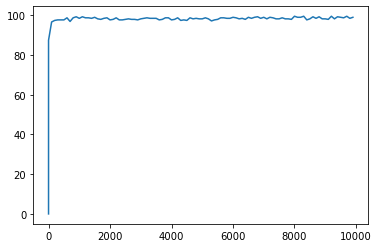

In [272]:
X_PM3 = featureEngineering1(X)
X_PM3 = featureEngineering2(X_PM3)
X_train, X_test, y_train, y_test = train_test_split(X_PM3, y, 0.33)
print(f'PM3: Train X - {X_train.shape}, Test X - {X_test.shape}, Train Y - {y_train.shape}, Test Y - {y_test.shape}\n')
weights, acc, iter = perceptron(X_train, y_train)
print(f'\nAccuracy of PM3 on test data: {100 * predict(X_test, y_test, weights)}')
plt.plot(iter, acc)
plt.show()

PM4

PM4: Train X - (381, 30), Test X - (188, 30), Train Y - (381,), Test Y - (188,)

Accuracy at iteration 0 : 87.4015748031496
Accuracy at iteration 1000 : 98.4251968503937
Accuracy at iteration 2000 : 97.63779527559055
Accuracy at iteration 3000 : 98.16272965879264
Accuracy at iteration 4000 : 97.63779527559055
Accuracy at iteration 5000 : 98.16272965879264
Accuracy at iteration 6000 : 98.9501312335958
Accuracy at iteration 7000 : 98.9501312335958
Accuracy at iteration 8000 : 99.47506561679789
Accuracy at iteration 9000 : 98.16272965879264

Accuracy of PM4 on test data: 93.08510638297872


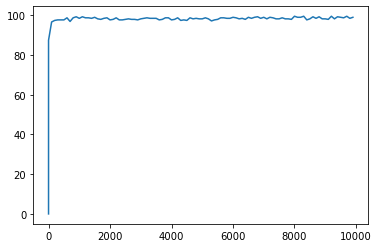

In [273]:
X_PM4 = featureEngineering1(X.sample(frac = 1, axis='columns'))
X_train, X_test, y_train, y_test = train_test_split(X_PM4, y, 0.33)
print(f'PM4: Train X - {X_train.shape}, Test X - {X_test.shape}, Train Y - {y_train.shape}, Test Y - {y_test.shape}\n')
weights, acc, iter = perceptron(X_train, y_train)
print(f'\nAccuracy of PM4 on test data: {100 * predict(X_test, y_test, weights)}')
plt.plot(iter, acc)
plt.show()


PART C

In [358]:
#sigmoid function
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z + 1e-15

In [407]:
#cost function
def cost_function(X,y,weights, bias):
    z = np.dot(X,weights) + bias
    cost = np.sum(y * np.log(sigmoid(z)) + (1-y) * np.log(1-sigmoid(z)))
    return -cost/X.shape[0]


In [390]:
def predictLogistic(X, y, weights, bias, threshold):
    predictions = sigmoid(np.dot(X, weights) + bias) > threshold
    return predictions.sum()/X.shape[0]

In [394]:
def logisticRegression(X, y, iter, learning_rate, batch_size, threshold = 0.5, isShuffle = True, isBatch = False):
    weights = np.zeros(X.shape[1])
    bias = 0
    cost_history = []
    iterations = []
    for i in range(iter):
        k = i
        if isShuffle:
            k = np.randm.randint(X.shape[0]-batch_size)
        if isBatch:
            k = 0            
        currX = X.iloc[k:k+batch_size, :]
        curry = y.iloc[k:k+batch_size]
        print(currX.shape, curry.shape)
        cost = cost_function(currX, curry, weights, bias)
        # if i%1 == 0:
        iterations.append(i)
        cost_history.append(cost)
        print(f'Cost at iteration {i} : {cost}, Accuracy: {100 * predictLogistic(currX, curry, weights, bias, threshold)}')
        
        weights = weights - (learning_rate/batch_size) * (np.dot(currX.T, (sigmoid(np.dot(currX, weights) + bias) - curry)))
        bias = bias - (learning_rate/batch_size) * (np.sum(sigmoid(np.dot(currX, weights) + bias) - curry))        
        
    return weights, bias, cost_history, iterations

In [369]:
X = data.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']
y.replace({'M' : 1, 'B' : 0}, inplace=True)
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(y.unique())

X shape: (569, 30)
y shape: (569,)
[1 0]


In [408]:
X_temp = featureEngineering1(X)
logisticRegression(X_temp, y, 8, 0.001, X.shape[0], 0.7, False, True)

(569, 30) (569,)
Cost at iteration 0 : 0.6931471805599458, Accuracy: 0.0
(569, 30) (569,)
Cost at iteration 1 : 0.8157808748459124, Accuracy: 100.0
(569, 30) (569,)
Cost at iteration 2 : 12.868577496873577, Accuracy: 0.0
(569, 30) (569,)
Cost at iteration 3 : -0.0, Accuracy: 100.0
(569, 30) (569,)
Cost at iteration 4 : 12.868577496873577, Accuracy: 0.0
(569, 30) (569,)
Cost at iteration 5 : -0.0, Accuracy: 100.0
(569, 30) (569,)
Cost at iteration 6 : 0.7327417851003942, Accuracy: 30.404217926186295
(569, 30) (569,)
Cost at iteration 7 : 2.004931297478577, Accuracy: 100.0


C:\Users\dhair\AppData\Local\Temp\ipykernel_12688\2667449577.py:4: RuntimeWarning: invalid value encountered in log
  cost = np.sum(y * np.log(sigmoid(z)) + (1-y) * np.log(1-sigmoid(z)))
C:\Users\dhair\AppData\Local\Temp\ipykernel_12688\591743231.py:3: RuntimeWarning: overflow encountered in exp
  z = 1/(1 + np.exp(-x))


(array([-1.70832134e-02, -2.92187628e-02, -1.06700042e-01, -3.38770904e-01,
        -1.59508233e-04, -8.13336416e-05,  3.11951138e-05,  1.52039114e-05,
        -3.01381512e-04, -1.15708443e-04, -2.04059621e-04, -2.22701175e-03,
        -1.37550452e-03,  1.19335265e-02, -1.34870330e-05, -2.77113835e-05,
        -3.07632306e-05, -1.26755737e-05, -3.75408858e-05, -6.15435526e-06,
        -1.70403802e-02, -3.74620961e-02, -1.06729816e-01, -1.92247306e-01,
        -2.10203025e-04, -1.43684693e-04, -2.09651015e-05, -2.98020357e-05,
        -4.44625280e-04, -1.34053612e-04]),
 -0.0013395234666468384,
 [0.6931471805599458,
  0.8157808748459124,
  12.868577496873577,
  -0.0,
  12.868577496873577,
  -0.0,
  0.7327417851003942,
  2.004931297478577],
 [0, 1, 2, 3, 4, 5, 6, 7])

In [345]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [346]:
x = np.array([1, 2, 3])
print(sigmoid(x))

[0.73105858 0.88079708 0.95257413]
